# ***MSDS610 Data Engineering Final Project* - First Notebook**

For this **Final Project Scenario**, I chose the ***Chicago AirBNB*** dataset from the kaggle, as it seemed a bit interesting for me than the Used Cars data.

### **Scenario Description:**
You and a group of friends are considering purchasing a property in Chicago that you can use as an investment. You have heard from other people that they have made a lot of money by renting out either a room or an entire unit (apartment or house). Your friends ask you to analyze data so that they can understand how much you would charge per night based on the type of dwelling you were to purchase.


#### ***Analytical Question:***
*Analyze the **Chicago AirBNB data**, to understand how much would be the charge per night based on the type of dwelling to purchase.*

### **The Process of the Assignment Analysis:**

1. **Picking up the Scenario:** I have picked the Chicago AirBNB scenario, which I would be using for the final project.

2. **Split and storing of the data:** I will be loading the csv dataset from the kaggle link, and randomly select 100 samples from the dataset, which will act as **Live Data**. Also, I will be using the remaining data for the analysis and process. Both the datasets, will be stored in the PostgreSQL.

3. **Data Definition, Preparation and Feature Selection:** Creating a Data Dictionary which lists out each fields, its description and data type. Then Performing all the EDA and Data cleaning methods to prepare the data for the further analysis. Then will be selecting the features to include for the analysis and remove the features which does not have any significant impact on the analysis.

4. **Feature Engineering and Final Data Preparation:** Creating 2-4 new features which could have an impact on the model to be built for the analysis, apply any normalizations and standardizations to the data if needed, log those features and save the dataset.

5. **Constructing an Optimal Model:** Describing the Target and Predictor variables, performing the 3-way split and choose various appropriate ML algorithms, train the models and if needed, optimize the models. Then saving the best model.

6. **Executing the model on the Live Data:** In a new notebook, will be loading the live data apply the same cleaning and feature engineering methods by the help of the User-Defined functions and run the live-data through the model to get the predictions.

7. **Storing the Predictions:** Adding the model's predictions as a new column in the live data and save the updated Dataset into the analytics schema.

8. **Insights and Evaluation:** Comparing the model's predictions with the actual target values and create the graphs or plots to visualize the model performance.

First and basic step is to import all the necessary libraries in Python.

In [1]:
# Importing the basic important libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Importing the library for the database connection:

import psycopg2
from sqlalchemy import create_engine

Now I will be loading the listings dataset and check the dataset for its information and descriptive statistics.

In [2]:
# Importing the dataset:

chicago_data = pd.read_csv('listings.csv')

chicago_data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,15-12-2019,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,14-07-2020,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,08-03-2020,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,23-10-2019,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,14-02-2020,0.61,5,168
5,10945,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.91183,-87.64000,Entire home/apt,115,4,19,06-08-2020,0.24,9,325
6,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,NaN,Near North Side,41.90452,-87.63320,Entire home/apt,99,5,9,14-01-2019,0.13,1,316
7,12140,Lincoln Park Guest House,46734,Sharon And Robert,NaN,Lincoln Park,41.92335,-87.64951,Private room,289,2,4,17-10-2018,0.06,1,179
8,22362,*** Luxury in Chicago! 2BR/ 2Ba / Parking / BB...,85811,Craig,NaN,West Town,41.89617,-87.66041,Entire home/apt,99,91,9,12-10-2014,0.11,2,365
9,24833,Private Apt 1 Block to Fullerton L Red Line - ...,101521,Red,NaN,Lincoln Park,41.92679,-87.65521,Entire home/apt,112,32,37,29-07-2018,0.29,4,180


In [3]:
# Checking the descriptive statistics and information of the dataset:

print('Descriptive Statistics of the Chicago data:',chicago_data.describe())

Descriptive Statistics of the Chicago data:                  id       host_id  neighbourhood_group     latitude  \
count  6.397000e+03  6.397000e+03                  0.0  6397.000000   
mean   2.813857e+07  9.850262e+07                  NaN    41.899049   
std    1.288337e+07  9.990222e+07                  NaN     0.058929   
min    2.384000e+03  2.140000e+03                  NaN    41.647360   
25%    1.875555e+07  1.705221e+07                  NaN    41.872740   
50%    2.994743e+07  5.738786e+07                  NaN    41.901860   
75%    3.959279e+07  1.580558e+08                  NaN    41.939780   
max    4.551558e+07  3.679071e+08                  NaN    42.022510   

         longitude         price  minimum_nights  number_of_reviews  \
count  6397.000000   6397.000000     6397.000000        6397.000000   
mean    -87.664042    153.020009        8.113178          42.753791   
std       0.042414    376.207706       22.786856          67.051609   
min     -87.846810      0.000000

In [4]:
chicago_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6397 non-null   int64  
 1   name                            6397 non-null   object 
 2   host_id                         6397 non-null   int64  
 3   host_name                       6397 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6397 non-null   object 
 6   latitude                        6397 non-null   float64
 7   longitude                       6397 non-null   float64
 8   room_type                       6397 non-null   object 
 9   price                           6397 non-null   int64  
 10  minimum_nights                  6397 non-null   int64  
 11  number_of_reviews               6397 non-null   int64  
 12  last_review                     52

### ***Data Definition:***

The Chicago AirBNB dataset contains 16 columns, each containing 6,397 values. The type of data each column has is described below:

#### **Data Type Classification for the Chicago Airbnb Dataset**

##### **1️. Nominal Data (Categorical, No Order)**
  1. **`id`** → Unique identifier for the listing  
  2. **`name`** → Name of the listing  
  3. **`host_id`** → Unique identifier for the host  
  4. **`host_name`** → Name of the host  
  5. **`neighbourhood_group`** → High-level grouping of neighborhoods (if available)  
  6. **`neighbourhood`** → Specific neighborhood where the listing is located  
  7. **`room_type`** → Type of room offered (`Entire home/apt`, `Private room`, etc.)  

##### **2️. Ordinal Data (Categorical, Ordered)**
  8. **`last_review`** → Date of the last review received (chronological order)  

##### **3️. Discrete Data (Numerical, Whole Numbers)**
  9. **`minimum_nights`** → Minimum number of nights required to book  
  10. **`number_of_reviews`** → Total number of reviews received  
  11. **`calculated_host_listings_count`** → Number of listings owned by the same host  
  12. **`availability_365`** → Number of available days in a year  

##### **4️. Continuous Data (Numerical, Can Take Any Value)**
  13. **`latitude`** → Latitude coordinate of the listing  
  14. **`longitude`** → Longitude coordinate of the listing  
  15. **`price`** → Price per night in USD  
  16. **`reviews_per_month`** → Average number of reviews per month  



For the Analytical question which is **`Analyze the Chicago AirBNB data, to understand how much would be the charge per night based on the type of dwelling to purchase.`**, the **Target Variable** is **`price`** column.

After checking out the dataset and defining all the columns and identifying the target variable, I will be initializing the database connection and check if it is connected properly or not.

In [5]:
# Firstly, Initializing a connection with the database:

host = '127.0.0.1'
db = 'MSDS610 DE'
user = 'postgres'
password = 'keshava' 
port = '5432'
schema_1 = 'cleaned'
schema_2 = 'raw'

conn_str = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}'

try:
    engine = create_engine(conn_str)
    conn = engine.connect()
    print("Connection successful!")
    conn.close()
except Exception as e:
    print(f"Connection failed: {e}")

Connection successful!


In [6]:
database_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, password, host, port, db))

**Extracting a 100 random samples from the dataset to create *Live data*, and using the remaining data as the actual dataset.**

I am going to randomly sample out 100 samples from the dataset which makes a **`live_data`** for my final project and then I will be rename the remaining data as **`main_data`** so that it is easier for me to analyse in this notebook and also it easier for me to remember.

In [8]:
# Creating the Live Data:

live_data = chicago_data.sample(n=100, random_state=42)
print('The shape of the live data:',live_data.shape)

The shape of the live data: (100, 16)


In [9]:
live_data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4963,40182247,3 bdrm; free internet in pilsen/southloop,306943744,Joe,NaN,Lower West Side,41.85974,-87.65797,Entire home/apt,200,1,1,17-02-2020,0.14,8,365
6356,45438479,English Lavender Room,258297883,Darkhan,NaN,Humboldt Park,41.88866,-87.71965,Private room,44,1,0,NaN,NaN,3,1
4866,39793384,ROWULA HOUSE - WARM AFRICAN HOSPITALITY IN CHI...,13784535,Omar,NaN,South Chicago,41.73711,-87.54816,Private room,45,1,1,31-08-2020,1.00,1,357
4022,35942729,Spacious Sedgwick Condo - Steps to Old Town,200416010,Saul,NaN,Near North Side,41.91054,-87.63743,Entire home/apt,255,3,11,07-09-2020,1.09,6,342
132,1468342,Quaint Serenity in Bronzeville,4081052,Suzetta,NaN,Grand Boulevard,41.81266,-87.61586,Private room,55,2,123,16-02-2020,1.42,1,364
4591,38870766,"Free parking, 2 blocks from train, 2 bedroom a...",59484991,Jady And,NaN,South Lawndale,41.85177,-87.70175,Entire home/apt,67,1,43,12-09-2020,3.66,1,177
1242,15257492,让你有如同回家的感觉,96810944,Lin & Peter,NaN,Avondale,41.93574,-87.73037,Private room,30,1,26,04-07-2020,0.54,3,266
263,3308694,"""The Annex II"" Huge 1,600 Sq foot Apartment",16707041,Matthew,NaN,Near West Side,41.88670,-87.64338,Entire home/apt,299,2,38,16-02-2020,0.78,2,361
5372,41901706,"Loft apt, easy access to many Chicago hot spots!",94999642,Sarah,NaN,Humboldt Park,41.89845,-87.70402,Entire home/apt,99,1,6,05-09-2020,0.83,1,1
351,4503332,Near The Loop and McCormick Place,20059524,(Email hidden by Airbnb),NaN,Armour Square,41.85586,-87.63569,Entire home/apt,100,1,86,15-03-2020,1.33,3,0


In [10]:
# Remained the columns which are required for the analysis:

main_data = chicago_data.drop(live_data.index)
print('The shape of the main data:',main_data.shape)

The shape of the main data: (6297, 16)


After successfully splitting the dataset into main_data and live_data, I will be saving those as csv files for easier analysis.

In [11]:
main_data.to_csv('main_data.csv')
live_data.to_csv('live_data.csv')

In [12]:
# Storing the dataset into the database:

main_data.to_sql('main_data', con=engine, schema='raw', if_exists='replace', index=False)

297

** As seen in the picture, the remaining data which I have labelled as 'main_data' for my analysis, has been stored in the PostgreSQL Raw Schema.**

<img align="center" style="padding-left:50px;" src="figures/main_data_raw_schema.png" width=350><br>


In [13]:
# Dropping the unnecessary columns:

drop_cols = ["id", "host_id", "host_name", "name", "neighbourhood_group", 
             "last_review", 'latitude', 'longitude']
main_data.drop(drop_cols, axis=1, inplace=True)


I have dropped the above as we do not need and there is no meaningful impact of any demographic information in any ML analysis.

In [14]:
main_data.head(10)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Hyde Park,Private room,60,2,178,2.56,1,353
1,South Lawndale,Entire home/apt,105,2,395,2.81,1,155
2,West Town,Entire home/apt,60,2,384,2.81,1,321
3,Lincoln Park,Entire home/apt,65,4,49,0.63,9,300
4,Hyde Park,Private room,21,1,44,0.61,5,168
5,Lincoln Park,Entire home/apt,115,4,19,0.24,9,325
6,Near North Side,Entire home/apt,99,5,9,0.13,1,316
7,Lincoln Park,Private room,289,2,4,0.06,1,179
8,West Town,Entire home/apt,99,91,9,0.11,2,365
9,Lincoln Park,Entire home/apt,112,32,37,0.29,4,180


The next steps are to clean the data and feature engineering before moving onto the ML model selection and predictions.

In [15]:
# Checking for the missing values in the dataset:

main_data.isnull().sum()

neighbourhood                        0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 1114
calculated_host_listings_count       0
availability_365                     0
dtype: int64

As we can see that there are over a thousand missing values in `reviews_per_month` column, which if dropped can create a disturbance in the model while perfforming predictions. So it is better to replace those missing values with the median of the values in that column, beacuse the column gives us the average number of reviews per month which cannot be treated with mean.

In [16]:
# Handling the missing values in the reviews_per_month column:

main_data['reviews_per_month'] = main_data['reviews_per_month'].fillna(main_data['reviews_per_month'].median())

# Checking the missing values after handling:

main_data.isnull().sum()

neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
# Checking for Categorical variables in the dataset:

main_data.dtypes

neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

As ML models cannot process categorical data types, which in our case are `room_type`, a.d `neighbourhood`. So those columns need to be converted into numerical columns, because of which I am using the Label Encoding.

In [18]:
# Encoding the object columns:

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
cat_cols = ['neighbourhood', 'room_type']

for col in cat_cols:
    le = LabelEncoder()
    main_data[col] = le.fit_transform(main_data[col])
    label_encoders[col] = le

print('Encoding is done !!!')

Encoding is done !!!


In [19]:
import joblib

joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

I have also saved the label encoder to ensure it is used in the live data process to avoid any issues while applying transformations in the live data.

In [20]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6297 entries, 0 to 6396
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   6297 non-null   int32  
 1   room_type                       6297 non-null   int32  
 2   price                           6297 non-null   int64  
 3   minimum_nights                  6297 non-null   int64  
 4   number_of_reviews               6297 non-null   int64  
 5   reviews_per_month               6297 non-null   float64
 6   calculated_host_listings_count  6297 non-null   int64  
 7   availability_365                6297 non-null   int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 393.6 KB


In [21]:
# Feature Engineering: Creating new features for the further analysis:

main_data["reviews_per_night"] = main_data["number_of_reviews"] / main_data["minimum_nights"]
main_data["availability_ratio"] = main_data["availability_365"] / 365
main_data["host_listings_ratio"] = main_data["calculated_host_listings_count"] / main_data["number_of_reviews"].replace(0, 1)
main_data["price_per_review"] = main_data["price"] / main_data["number_of_reviews"].replace(0, 1)

To improve model performance, I have created new features that provide additional insights:
1. **`reviews_per_night`** = `number_of_reviews / minimum_nights`
2. **`availability_ratio`** = `availability_365 / 365`
3. **`host_listings_ratio`** = `calculated_host_listings_count / number_of_reviews`
4. **`price_per_review`** = `price / number_of_reviews`

## **Why These Features Matter?**
- **`reviews_per_night`** helps assess guest engagement.
- **`availability_ratio`** shows how frequently listings are open for booking.
- **`host_listings_ratio`** helps understand if a host has multiple listings.
- **`price_per_review`** indicates if higher-priced listings receive more reviews.



I will be uploading this dataset into the database, after adding the predictions of the price, right after finding the best optimal model for the analysis.

In [22]:
main_data.head(10)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_night,availability_ratio,host_listings_ratio,price_per_review
0,33,2,60,2,178,2.56,1,353,89.000000,0.967123,0.005618,0.337079
1,64,0,105,2,395,2.81,1,155,197.500000,0.424658,0.002532,0.265823
2,75,0,60,2,384,2.81,1,321,192.000000,0.879452,0.002604,0.156250
3,38,0,65,4,49,0.63,9,300,12.250000,0.821918,0.183673,1.326531
4,33,2,21,1,44,0.61,5,168,44.000000,0.460274,0.113636,0.477273
5,38,0,115,4,19,0.24,9,325,4.750000,0.890411,0.473684,6.052632
6,47,0,99,5,9,0.13,1,316,1.800000,0.865753,0.111111,11.000000
7,38,2,289,2,4,0.06,1,179,2.000000,0.490411,0.250000,72.250000
8,75,0,99,91,9,0.11,2,365,0.098901,1.000000,0.222222,11.000000
9,38,0,112,32,37,0.29,4,180,1.156250,0.493151,0.108108,3.027027


After all the process of feature engineering, it is time to split the data for training, testing and validation, and for that, I need to distinguish the features and the target variables.

In [23]:
# Splitting the data into X and y:

x = main_data.drop(columns=['price'], axis=1)
y = main_data['price']

In [24]:
# Feature Scaling of the Numerical Columns:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

Features like `price` and `minimum_nights` have different **value ranges**. Standardization guarantees that all features contribute **equally** to the model. For that reason, I have applied the scaling to
  - `minimum_nights`
  - `number_of_reviews`
  - `reviews_per_month`
  - `availability_365`
  - Engineered features (`reviews_per_night`, `host_listings_ratio`, etc.)

In [41]:
# Saving the scaler:

import joblib

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

I have saved the standard scaler as a pickjle file for the same reason i have saved the label encoders, which is to use it on the live data while applying transformations by using User-Defined Functions.

In [25]:
# Splitting the data in a three-way split:

from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

The dataset must be divided into **training, validation, and test sets** to evaluate model performance, to prevent **overfitting** and ensure **generalization** to the new data.

#### **Finding an Optimal Model:**

I have chosen three models to find the optimal model, which are:

1. `Linear Regression`: As it is the basic regression model for predictions and simple to use.
2. `Random Forest Regressor`: As it can capture complex relationships and uses multiple decision trees for prediction.
3. `Gradient Boosting Regressor`: As it builds trees sequentially and works well on the structured data, also reducing errors better than other models.

In [26]:
# Using Linear Regression:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model_1 = LinearRegression()
model_1.fit(x_train, y_train)
y_pred = model_1.predict(x_test)
print(f"Linear Regression R2 Score: {model_1.score(x_test, y_test)}")
print(f"Linear Regression Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Linear Regression R2 Score: 0.2429166684236027
Linear Regression Mean Absolute Error: 78.51449733440028


In [27]:
# Using Random Forest:

from sklearn.ensemble import RandomForestRegressor

model_2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_2.fit(x_train, y_train)
y_pred = model_2.predict(x_test)
print(f"Random Forest R2 Score: {model_2.score(x_test, y_test)}")
print(f"Random Forest Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Random Forest R2 Score: 0.7380580730373036
Random Forest Mean Absolute Error: 16.65878306878307


In [28]:
# Using Gradient Boosting:

from sklearn.ensemble import GradientBoostingRegressor

model_3 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_3.fit(x_train, y_train)
y_pred = model_3.predict(x_test)
print(f"Gradient Boosting R2 Score: {model_3.score(x_test, y_test)}")
print(f"Gradient Boosting Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Gradient Boosting R2 Score: 0.8290174224037561
Gradient Boosting Mean Absolute Error: 22.755809930303975


Based on the R2-Score and MAE metrics results on the test set, I think that the Gradient Boosting Algorithm is the optimal model for the data as the balance between R2-score and MAE is best in the Gradient Boosting Algorithm. 


But we will know for sure if it is the optimal model or not after testing on the validation set.

In [29]:
# Testing the model on the validation set:

y_pred = model_3.predict(x_val)
print(f"Gradient Boosting R2 Score: {model_3.score(x_val, y_val)}")
print(f"Gradient Boosting Mean Absolute Error: {mean_absolute_error(y_val, y_pred)}")

Gradient Boosting R2 Score: 0.9505338906970745
Gradient Boosting Mean Absolute Error: 19.253982622985355


In [30]:
# Testing the model on the validation set for Random Forest:

y_pred = model_2.predict(x_val)
print(f"Random Forest R2 Score: {model_2.score(x_val, y_val)}")
print(f"Random Forest Mean Absolute Error: {mean_absolute_error(y_val, y_pred)}")

Random Forest R2 Score: 0.9331342338800159
Random Forest Mean Absolute Error: 11.718105820105821


In [31]:
# Testing the model on the validation set for Linear Regression:

y_pred = model_1.predict(x_val) 
print(f"Linear Regression R2 Score: {model_1.score(x_val, y_val)}")
print(f"Linear Regression Mean Absolute Error: {mean_absolute_error(y_val, y_pred)}")

Linear Regression R2 Score: 0.8035231914600088
Linear Regression Mean Absolute Error: 70.98419897540276


Based on the testing on the validation set for the optimal model, the R2 score and MAE is improved, but for the optimal model, with a right balance of the R2-score and MAE, I choose the Gradient Boosting Algorithm, as it has improved the scores a lot on the validation set.

In [32]:
# Saving the model:

import joblib

joblib.dump(model_3, 'GradBoost.joblib')

['GradBoost.joblib']

I have saved the Gradient Boosting Regressor model as the optimal model which is to be used on the live data.

                           Feature  Importance
10                price_per_review    0.542244
7                reviews_per_night    0.149366
3                number_of_reviews    0.145024
9              host_listings_ratio    0.111248
4                reviews_per_month    0.034613
1                        room_type    0.010952
8               availability_ratio    0.002070
6                 availability_365    0.001383
0                    neighbourhood    0.001349
5   calculated_host_listings_count    0.001219
2                   minimum_nights    0.000531


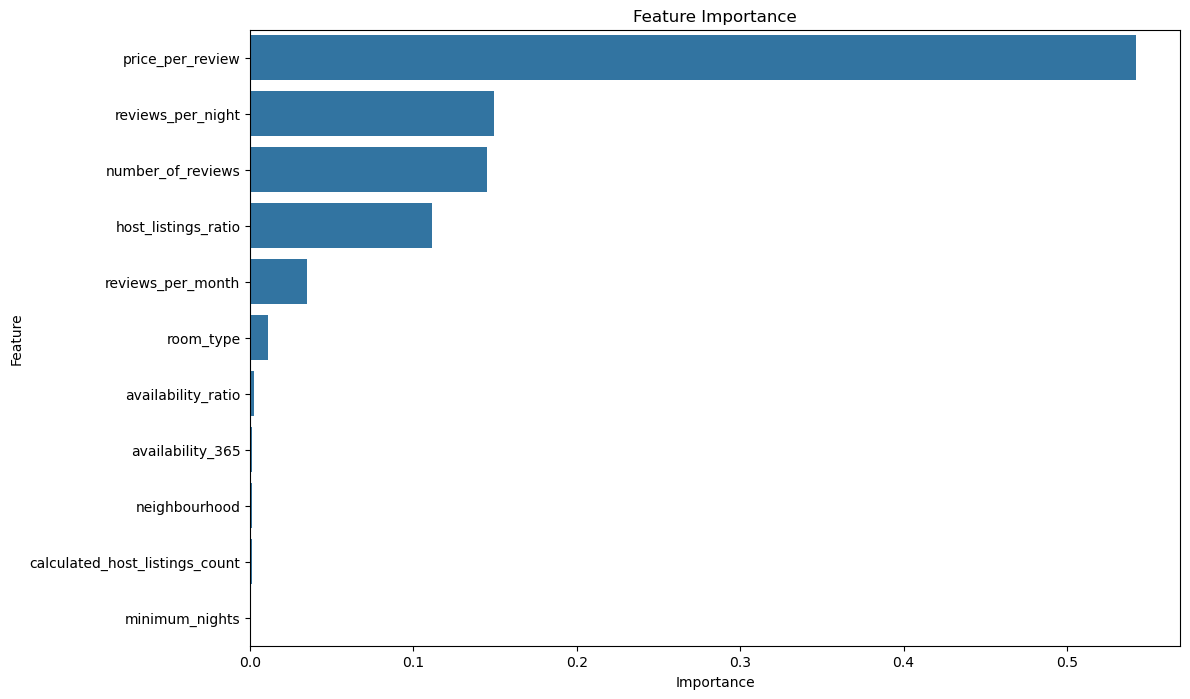

In [33]:
# Feature Importance:

features = main_data.drop(columns=['price'], axis=1).columns

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)


# Plotting the Feature Importance:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [34]:
# Now making and storing the predictions for the main data:

predictions = model_3.predict(x)
main_data['price_pred'] = predictions
main_data.to_csv('main_data_predictions.csv')

In [35]:
main_data.head(10)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_night,availability_ratio,host_listings_ratio,price_per_review,price_pred
0,33,2,60,2,178,2.56,1,353,89.000000,0.967123,0.005618,0.337079,51.134859
1,64,0,105,2,395,2.81,1,155,197.500000,0.424658,0.002532,0.265823,92.113129
2,75,0,60,2,384,2.81,1,321,192.000000,0.879452,0.002604,0.156250,90.597962
3,38,0,65,4,49,0.63,9,300,12.250000,0.821918,0.183673,1.326531,79.396457
4,33,2,21,1,44,0.61,5,168,44.000000,0.460274,0.113636,0.477273,34.685068
5,38,0,115,4,19,0.24,9,325,4.750000,0.890411,0.473684,6.052632,111.695920
6,47,0,99,5,9,0.13,1,316,1.800000,0.865753,0.111111,11.000000,116.679948
7,38,2,289,2,4,0.06,1,179,2.000000,0.490411,0.250000,72.250000,271.493541
8,75,0,99,91,9,0.11,2,365,0.098901,1.000000,0.222222,11.000000,115.423439
9,38,0,112,32,37,0.29,4,180,1.156250,0.493151,0.108108,3.027027,108.620898


In [36]:
# Storing the Predictions in the Database:



main_data.to_sql('main_data_predictions', con=engine, schema='cleaned', if_exists='replace', index=False)

297

In [37]:
# Storing the Predictions from the main data as a seperate table:

main_pred = pd.DataFrame(main_data['price_pred'])
main_pred.to_sql('main_pred', con=engine, schema='predictions', if_exists='replace', index=False)

297

I have stored the predictions as a seperate dataframe in the predictions schema, as shown in the picture 1, and also added the predictions in the main data and added the data into the database in the cleaned schema as shown in the picture 2

<img align="left" style="padding-left:50px;" src="figures/main_data_pred.png" width=350><br>

<img align="center" style="padding-left:50px;" src="figures/main_data_cleaned_cleaned_schema.png" width=350><br>


In [38]:
# Creating the Data Frame for all the transformation methods used on the main_data columns:

transformation_methods = pd.DataFrame({'Field': ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 
                                                 'neighbourhood', 'latitude', 'longitude', 'room_type', 
                                                 'price', 'minimum_nights', 'number_of_reviews', 'last_review',
                                                 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 
                                                 'reviews_per_night', 'availability_ratio', 'host_listings_ratio', 
                                                 'price_per_review'],
                                        'Action': ['Drop', 'Drop', 'Drop', 'Drop', 'Drop', 'Label Encoding', 'Drop', 'Drop',
                                                    'Label Encoding', ' ', 'Standard Scaling', 'Standard Scaling', 'Drop',
                                                    'Standard Scaling and Median Replace', 'Standard Scaling', 'Standard Scaling', 
                                                    'Feature Engineering', 'Feature Engineering', 'Feature Engineering', 
                                                    'Feature Engineering']})

In [39]:
transformation_methods

,Field,Action
0,id,Drop
1,name,Drop
2,host_id,Drop
3,host_name,Drop
4,neighbourhood_group,Drop
5,neighbourhood,Label Encoding
6,latitude,Drop
7,longitude,Drop
8,room_type,Label Encoding
9,price,


In [40]:
# Storing the transformation methods into the database:

transformation_methods.to_sql('transformation_methods', con=engine, schema='Transform', if_exists='replace', index=False)

20

I have stored the Transformation methods as a dataframe into the PostgreSQL in the Transformations schema, as shown in the picture:

<img align="center" style="padding-left:50px;" src="figures/transform_methods.png" width=350><br>
